In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

In [2]:
np.random.seed(50)

# synthetic data generation using uniform and exponential distribution


In [68]:
import numpy as np

np.random.seed(0)  # For reproducibility

mean1 = 10
mean2 = 500
mean3 = 1000

size = 1000

means = [mean1, mean2, mean3]

correlation_matrix = np.array([[1, 0.35, 0.75],
                               [0.35, 1, 0.8],
                               [0.75, 0.8, 1]])

data = np.random.multivariate_normal(means, correlation_matrix, size)

In [70]:
data_ex = pd.DataFrame(data  , columns = ['Average Duration Call' , 'Average Data Usage'  , 'Sum money spending'])

In [71]:
data_ex.describe()

,Average Duration Call,Average Data Usage,Sum money spending
count,1000.000000,1000.000000,1000.000000
mean,9.987700,500.028374,999.997062
std,0.971797,0.952077,0.951486
min,7.060659,497.184444,997.182223
25%,9.343922,499.385484,999.332849
50%,9.969142,499.994511,1000.004221
75%,10.637775,500.683349,1000.643992
max,12.811977,503.032959,1003.267246


# analyzing the dataset ( exponential distribution )

In [72]:
data_ex.describe()

,Average Duration Call,Average Data Usage,Sum money spending
count,1000.000000,1000.000000,1000.000000
mean,9.987700,500.028374,999.997062
std,0.971797,0.952077,0.951486
min,7.060659,497.184444,997.182223
25%,9.343922,499.385484,999.332849
50%,9.969142,499.994511,1000.004221
75%,10.637775,500.683349,1000.643992
max,12.811977,503.032959,1003.267246


Text(0, 0.5, 'number of customers')

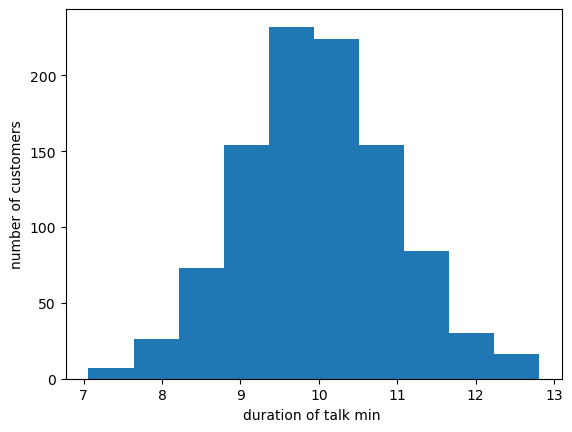

In [74]:
_ = plt.hist(x = data_ex['Average Duration Call'])
plt.xlabel('duration of talk min ')
plt.ylabel('number of customers')

Text(0, 0.5, 'number of customers')

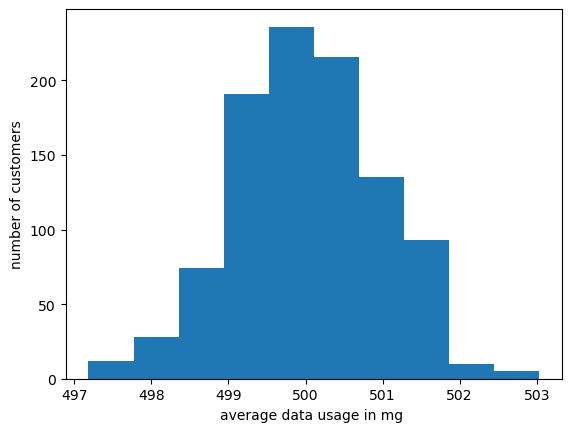

In [75]:
_ = plt.hist(x = data_ex['Average Data Usage'])
plt.xlabel('average data usage in mg ')
plt.ylabel('number of customers')

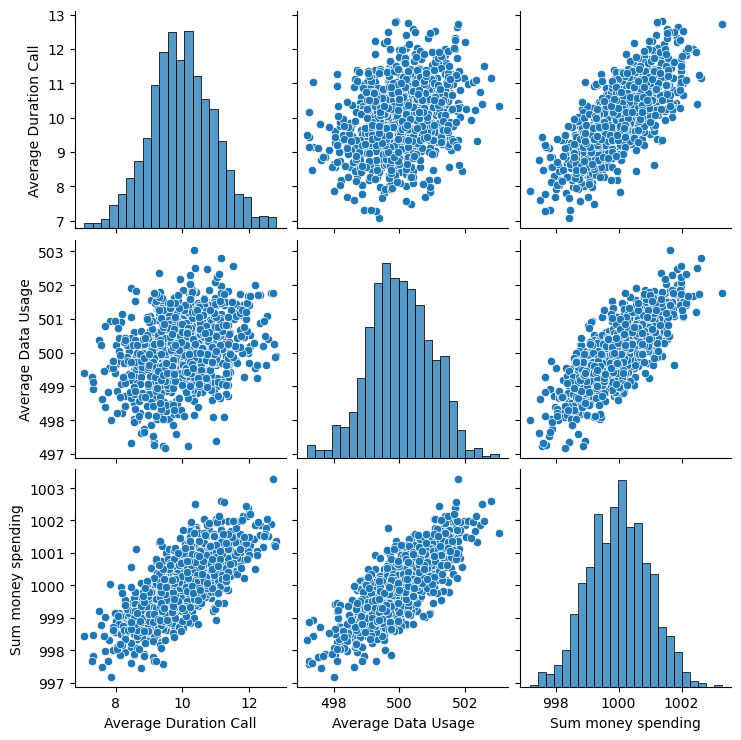

In [76]:
sns.pairplot(data = data_ex )

# classification of cutomers into good and bad

In [ ]:
def classify_cutomers(df):
    
    a  = df['sqrt duration']
    b  = df['sqrt data']
    c  = df['sqrt money']
    
    if (a > 15 ** 0.5 or b > 700 ** 0.5) and c > 1500**0.5:
        return 'good customer'
    
    elif (a > 15**0.5 or c  > 1500**0.5) and b > 700**0.5:
        return 'good customer'
    
    elif (b > 700**0.5 or c > 1500**0.5) and a > 15**0.5:
        return 'good customer'
    
    else:
        return 'bad customers'

    
    

In [ ]:
def label_customers(df):
    
    if df['classification'] == 'good customer':
        return 1
    
    else:
        return 0 
    

In [ ]:
# apply classify customer function to the data 

data_ex['classification'] = data_ex.apply(classify_cutomers  , axis = 1 ) 

In [ ]:
# label good cutomers to 1 and bad customers to 0 

data_ex['label'] = data_ex.apply(label_customers , axis = 1)

In [ ]:
data_ex

# validating the dataset

In [ ]:
data_ex['classification'].value_counts()

In [ ]:
data_ex.groupby(by = 'classification').describe()

In [ ]:
# Calculate average speaking time for each customer group
avg_speaking_time = data_ex.groupby('classification')['Average Duration Call'].mean().reset_index()

# Create the plot using Plotly
fig = px.bar(avg_speaking_time, x='classification', y='Average Duration Call', color='classification',
             labels={'classification': 'Customer Classification', 'Average Duration Call': 'Average Speaking Time'})

# Set the title
fig.update_layout(title_text='Average Speaking Time by Customer Classification')

# Show the plot
fig.show()

# regression model with hyperparameter optimization 

In [ ]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , recall_score , f1_score
from imblearn.over_sampling import SMOTE

In [ ]:
X = data_ex.iloc[: , :-2]
y = data_ex.iloc[: , -1]

# scaling fetures

In [ ]:
scaler = MinMaxScaler()

X = scaler.fit_transform(X)

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y ,test_size = 0.3 , random_state= 42 , )

In [ ]:


# Assuming you have your feature matrix X and target vector y
# Create an instance of SMOTE
smote = SMOTE()

# Generate the synthetic samples using SMOTE
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
ridge = Ridge()

ridge.fit(X_train , y_train)


In [ ]:
y_pred = ridge.predict(X_test)

In [ ]:
y_pred_binary = [1 if val >= 0.6 else 0 for val in y_pred]

In [ ]:
accuracy = accuracy_score(y_test, y_pred_binary)

# Print the accuracy
print("Accuracy:", accuracy)

In [ ]:
confusion = confusion_matrix(y_test, y_pred_binary)
confusion

# row : real, column : predicted

In [ ]:
# false postive : مشتری های بد که به اشتباه گفته شده خوب هستند - اینا خیلی مهمن چون اینا وامو پس نمیدن باید کم بشه
# false negative: مشتری های خوب که به اشتباه گفته شده بد هستند 

In [ ]:
sns.heatmap(confusion , annot = True)
plt.xlabel('predcited')
plt.ylabel('real')

In [ ]:
print('precision score :' , precision_score(y_test , y_pred_binary))
print('recall score : ' , recall_score(y_test , y_pred_binary))
print('F1_score :' , f1_score(y_test , y_pred_binary))


# Precision:
#Precision measures the proportion of correctly predicted positive
#instances out of all instances predicted as positive. 
#It quantifies how well the model performs in terms of minimizing false positives. 
#It is calculated as the ratio of true positives (TP) to the sum of true positives and false positives (FP):
#Precision = TP / (TP + FP)

# check the model and find a function

In [ ]:
coefficients = ridge.coef_
intercept = ridge.intercept_

# X1 = Average Duration Call X2 = Average Data Usage X3 = Sum of Money Spending 	
# Print the function (equation) of the best Ridge model
function = "y = "
for i in range(len(coefficients)):
    if i == 0:
        function += f"{coefficients[i]:.2f} * x{i+1}"
    else:
        function += f" + {coefficients[i]:.2f} * x{i+1}"
function += f" + {intercept:.2f}"
print("Ridge function:", function)


# generating an input and predict the type of customers

In [ ]:
input1 = input('Average Duration Call  ,  average data usasge  , Sum od money spending ').split()
a=  [ [float(i) for i in input1  ]]

sample = scaler.transform(a)


In [ ]:
def customer(sample):

    prediction = ridge.predict(sample)
    if prediction > 0.4:
        return 'good customer'
    
    else: 
        return 'bad customer'
    
customer(sample)

# Logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Lo = LogisticRegression()


Lo.fit(X_train , y_train )

In [ ]:
y_train.value_counts()

In [ ]:
predicted_probabilities = Lo.predict_proba(X_test)

# Set the new threshold
new_threshold = 0.6

# Adjust the classification based on the new threshold
predicted_labels = np.where(predicted_probabilities >= new_threshold, 1, 0)[:, 1]

In [ ]:
accuracy = accuracy_score(y_test, predicted_labels)
accuracy_train = accuracy_score(y_train , Lo.predict(X_train))
# Print the accuracy
print("Accuracy test :", round(accuracy , 2))
print('Accuracy train :' ,round(accuracy_train , 2) )
print('precision score :' , round(precision_score(y_test , predicted_labels) , 2))
print('recall score : ' , round(recall_score(y_test , predicted_labels),2))
print('F1_score :' , round(f1_score(y_test , predicted_labels) , 2))



In [ ]:
confusion = confusion_matrix(y_test, predicted_labels)
confusion

In [ ]:
sns.heatmap(confusion , annot = True)
plt.xlabel('predcited')
plt.ylabel('real')